In [1]:
import os
import json
from pprint import pprint

In [2]:
MOJO_DIR = os.path.join('data','boxofficemojo') 
META_DIR = os.path.join('data','metacritic') 

In [3]:
def get_movies(directory):
    '''Returns a list of dictionaries containing information in the
    JSON files of the provided directory, and prints the number
    of movies read'''
    file_contents = os.listdir(directory)
    movie_list=[]
    for filename in file_contents:
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as movie_file:
            movie_data = json.load(movie_file)
        if type(movie_data) == dict:
            movie_list.append(movie_data)
    print "Parsed %i movies from %i files" % (len(movie_list),
                                              len(file_contents))
    return movie_list

In [4]:
mojomovies=get_movies(MOJO_DIR)
metacriticmovies=get_movies(META_DIR)

Parsed 3728 movies from 3728 files
Parsed 4765 movies from 4767 files


In [5]:
from datetime import datetime

In [6]:
for movie in mojomovies:
    if movie['release_date_limited']:
        movie['release_date_limited']=datetime.strptime(movie['release_date_limited'],'%Y-%m-%d').date()
    if movie['release_date_wide']:
        movie['release_date_wide']=datetime.strptime(movie['release_date_wide'],'%Y-%m-%d').date()

In [7]:
import numpy as np
import pandas as pd

In [8]:
mojo_df = pd.DataFrame(mojomovies)
meta_df = pd.DataFrame(metacriticmovies)
merged_df = pd.merge(meta_df, mojo_df, how='outer', on='title')
#print mojo_df.shape
#print meta_df.shape
#print merged_df.shape
#print mojo_df.columns.values
#print meta_df.columns.values
#print merged_df.columns.values

In [9]:
merged_df=merged_df.sort('title')
#merged_years=merged_df[['year_x','year_y']]
#merged_directors=merged_df[['director_x','director_y']]
#both_directors=merged_directors.dropna(axis=0)
#notequal_directors=both_directors[both_directors.director_x!=both_directors.director_y]
#both_years=merged_years.dropna(axis=0)
#notequal_years=both_years[both_years.year_x!=both_years.year_x]

In [10]:
merged_df['year'] = merged_df['year_x'].fillna(merged_df['year_y'])

In [11]:
merged_df['director'] = merged_df['director_x'].fillna(merged_df['director_y'])

In [12]:
merged_df=merged_df.dropna(subset=['year'])

In [13]:
modelinputs = merged_df[['title',
                         'year',
                         'genre',
                         'release_date',
                         'runtime_minutes',
                         'studio',
                         'production_budget',
                         'release_date_limited',
                         'director',
                         'worldwide_gross']].dropna(subset=['worldwide_gross'])

In [14]:
merged_df.columns.values
mojo_df.columns.values
meta_df.columns.values
mojo_budget=mojo_df.dropna(subset=['production_budget'])

In [15]:
merged_df.columns

Index([            u'complete',           u'director_x',
                      u'genre',      u'metacritic_page',
                  u'metascore',   u'num_critic_reviews',
           u'num_user_ratings',     u'num_user_reviews',
                     u'rating',         u'release_date',
            u'runtime_minutes',               u'studio',
                      u'title',   u'unable to retrieve',
                 u'user_score',               u'year_x',
                  u'alt_title',           u'director_y',
             u'domestic_gross',            u'mojo_slug',
        u'opening_per_theater', u'opening_weekend_take',
          u'production_budget', u'release_date_limited',
          u'release_date_wide',       u'widest_release',
            u'worldwide_gross',               u'year_y',
                       u'year',             u'director'],
      dtype='object')

In [16]:
inter_dom_df = pd.DataFrame(merged_df, columns=['year','genre','rating','director','runtime_minutes','production_budget','domestic_gross','worldwide_gross'])

In [17]:
inter_dom_df

,year,genre,rating,director,runtime_minutes,production_budget,domestic_gross,worldwide_gross
70,2015,"[Action, Drama, Thriller, War]",R,Yann Demange,99,NaN,1223516,1578516
65,2009,"[Drama, Comedy, Romance]",PG-13,Marc Webb,95,7500000,32391374,60722734
0,1999,"[Comedy, Romance]",PG-13,Gil Junger,97,30000000,38178166,53478166
1,2012,"[Drama, Comedy, Romance]",R,Jamie Linden,100,NaN,203373,203373
4765,2008,NaN,NaN,Roland Emmerich,NaN,105000000,94784201,269784201
2,2008,"[Adventure, Drama, Fantasy]",PG-13,Roland Emmerich,109,NaN,NaN,NaN
3,1996,"[Adventure, Comedy, Family]",G,Stephen Herek,103,NaN,NaN,NaN
4,2000,"[Comedy, Family]",G,Kevin Lima,100,NaN,NaN,NaN
4766,2000,NaN,NaN,None,NaN,85000000,66957026,183611771
6,2013,[Drama],Not Rated,Xiaoshuai Wang,110,NaN,NaN,NaN


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
df2 = pd.DataFrame(inter_dom_df, columns=['year','domestic_gross','worldwide_gross'])

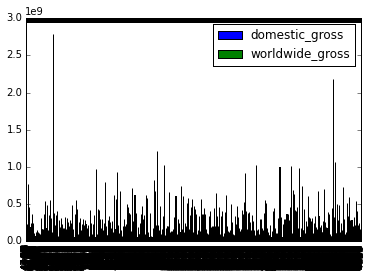

In [20]:
df2.plot(kind='bar');